<a href="https://colab.research.google.com/github/Korniev/Data-Sciense/blob/main/hw_09/hw_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету fasion_mnist.

##Завантаження та підготовка даних

Перше, з чого нам потрібно почати – це завантажити датасет Fashion MNIST. Він доступний безпосередньо через Keras. Імпортуємо бібліотеки:

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras import optimizers, losses
from sklearn.metrics import classification_report

Завантажимо датасет і подивимось на його вміст:

In [25]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

Кожному зображенню відповідає одна мітка. Оскільки назви класів не включено до набору даних, збережемо їх тут, щоб використати пізніше при побудові зображень:

In [26]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Давайте подивимось на перший елемент датасету:

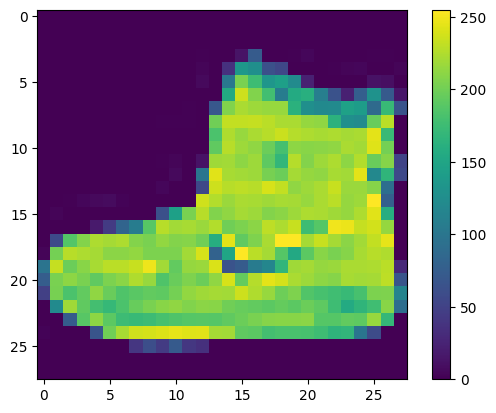

In [27]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

Після завантаження нам потрібно нормалізувати дані. Це зробить процес навчання мережі більш ефективним. Тобто будуть дані в діапазоні від 0 до 1.

In [28]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


Щоб переконатися, що дані в правильному форматі, і що ми готові до побудови та навчання мережі, покажемо перші 25 зображень з навчального набору і покажемо назву класу під кожним зображенням.

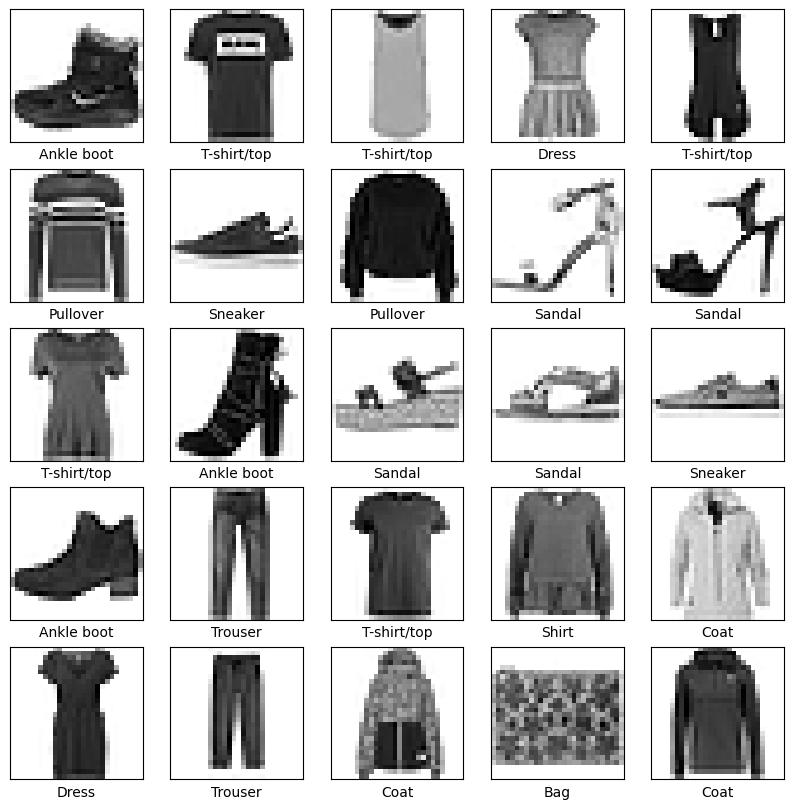

In [29]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

##Побудова моделі

Окей, супер. Зараз в нас вже є завантажений нормалізований датасет. Тепер ми вже можемо створити нашу модель. Ми почнемо з простої моделі і поступово будемо додавати шари(якщо це буде потрібно) та експериментувати з гіперпараметрами.

In [40]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(128, activation='sigmoid'),
    Dropout(0.1),
    Dense(10, activation='softmax')
])

Перед тренуванням моделі нам її потрібно скомпілювати. Це включає вибір оптимізатора, функції втрат і метрик для оцінки.

In [41]:
model.compile(optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Тепер ми можемо навчати модель, використовуючи тренувальні дані:

In [42]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 4ms/step - loss: 0.6284 - accuracy: 0.7832 - val_loss: 0.4440 - val_accuracy: 0.8405
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.4084 - accuracy: 0.8529 - val_loss: 0.3886 - val_accuracy: 0.8612
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.3663 - accuracy: 0.8669 - val_loss: 0.3930 - val_accuracy: 0.8542
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.3376 - accuracy: 0.8766 - val_loss: 0.3447 - val_accuracy: 0.8758
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.3181 - accuracy: 0.8825 - val_loss: 0.3308 - val_accuracy: 0.8761
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2987 - accuracy: 0.8896 - val_loss: 0.3306 - val_accuracy: 0.8783
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2850 - accuracy: 0.8956 - val_loss: 0.3224 - val_accuracy: 0.8806
Epoch 

Давайте візуалізуємо отримані дані шляхом відображення отриманих результатів на графіках

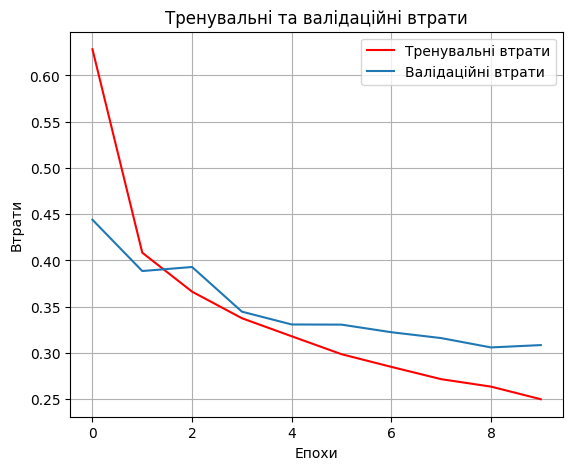

In [43]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Тренувальні втрати', color='red')
plt.plot(history.history['val_loss'], label='Валідаційні втрати')
plt.title('Тренувальні та валідаційні втрати')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.grid(True)
plt.legend()


plt.show()

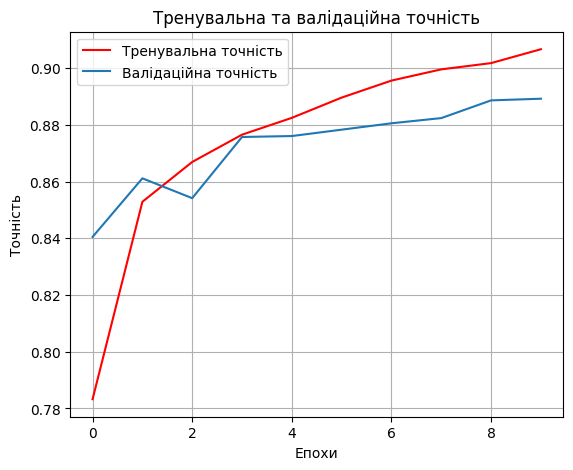

In [44]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Тренувальна точність', color='red')
plt.plot(history.history['val_accuracy'], label='Валідаційна точність')
plt.title('Тренувальна та валідаційна точність')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.grid(True)
plt.legend()

plt.show()

Як бачимо, наша модель має достатньо адеватні оцінки точності та втрат

Давайте подивимось на метрики якості по кожному класу:

In [45]:
y_pred_classes = np.argmax(model.predict(x_test), axis=1)
print(classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.73      0.86      0.79      1000
           3       0.90      0.88      0.89      1000
           4       0.80      0.81      0.80      1000
           5       0.98      0.94      0.96      1000
           6       0.74      0.64      0.69      1000
           7       0.90      0.98      0.94      1000
           8       0.96      0.98      0.97      1000
           9       0.96      0.93      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



#Прогноз:

Визначимо функції для побудови графіка повного набору з 10 передбачень класів.

In [46]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Зробимо прогнозування

In [47]:
predictions = model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


Побудуємо кілька зображень з їхніми прогнозами:

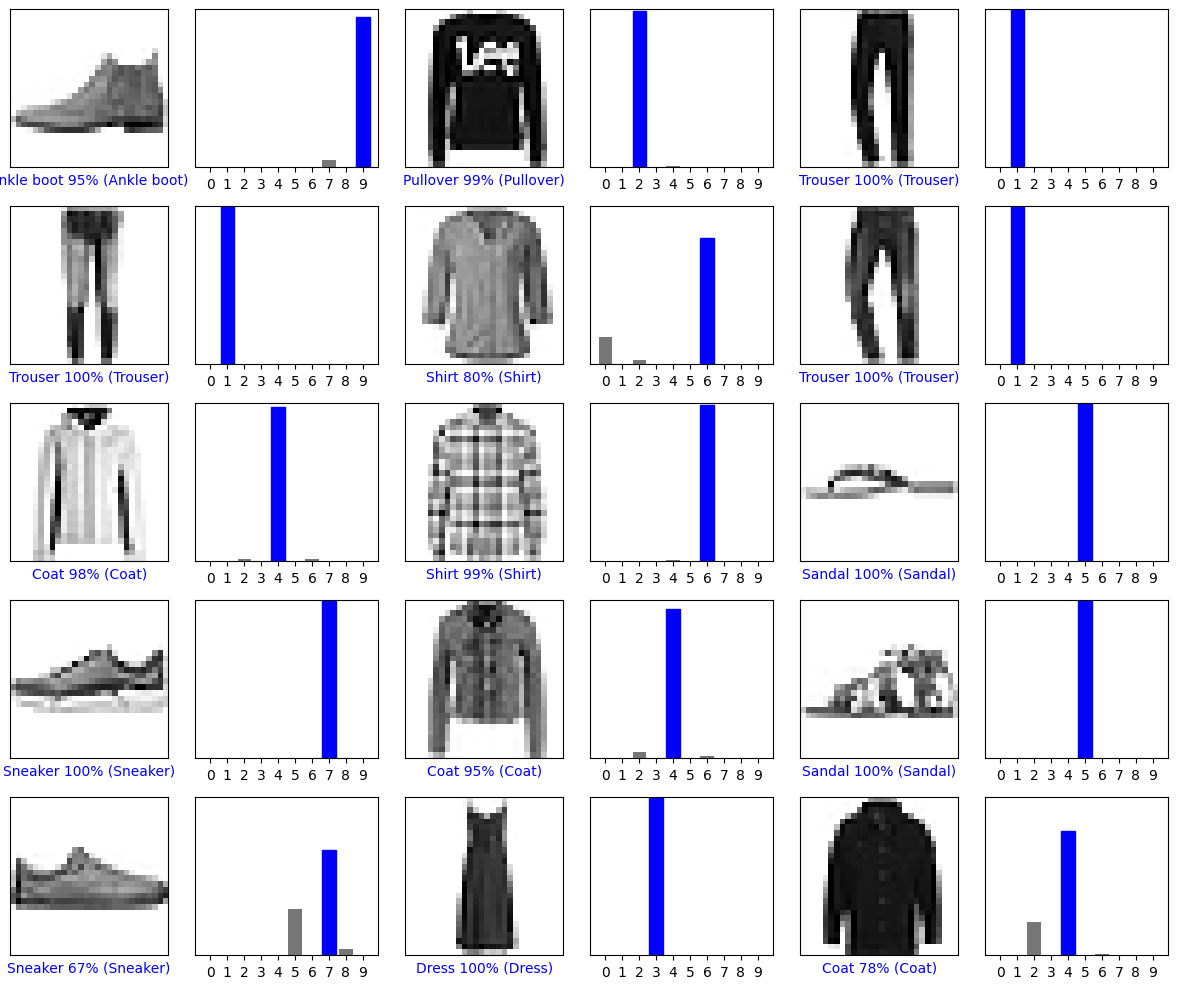

In [48]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

#Висновок:

Підібʼємо підсумки:

Ми створили нейронну мережу з трьома шарами та активаційними функціями relu,sigmoid, softmax. Також додали Dropout(0.1) для того, щоб наша модель не перенавчалась. Використали оптимізатор Adam та функцію втрат sparse_categorical_crossentropy. Навчили модель на 10 епохах. Візуалізували отримані результати на графіках та потім провели прогнозування. Отримали результати 90,6% точність тренована і 89 % точність валідована.

Як бачимо, наша модель доволі непогано навчилась і може адекватно класифікувати типи одягу. В нашому випадку ми отримали результат правильних прогнозувань 15 з 15, хоча на 13 картинці мережа нам сказала, що це sneaker, але тільки з 70% ймовірністю. Видно, що модель може "сумніватись" з результатом, що є нормальним при даній точності валідаціних даних.